## Analyze Financial Data with Python Capstone Project

For this project, I am working as a wealth manager at a small firm where I have clients seeking advice on how to invest their money. A young client wants to invest a large amount of their savings in a portfolio of stocks, but they are unsure of what stocks to invest in and at what amounts.

For this client, we are going to be examining stocks from several different sectors: 
* Microsoft (MSFT)
* Tesla (TSLA)
* Delta Airlines (DAL)
* UGI Corporation (UGI)
* Pfizer (PFE)
* Sorrento Therapeutics, Inc (SRNE)
* JPMorgan Chase & Co (JPM) 
* Tyson Food Company (TSN)
* Hyatt Hotels Corporation (H)
* AllianceBernstein (AB)




### 1. Import Packages

#### Import Needed Modules

In [1]:
import pandas as pd
import numpy as np
from pandas_datareader import data as pdr
import yfinance as yfin
import matplotlib.pyplot as plt
import seaborn as sns
import cvxopt as opt
from cvxopt import blas, solvers

#### Step 2: Import Financial Package
Import the pandas data reader module as `web`. (Ensure the module is installed with `pip install pandas-datareader` on the command line)

In [2]:
import pandas_datareader as web

#### Step 3: Import Visualization Package
Import the matplotlib `pyplot` module as `plt`. (Write `%matplotlib inline` below the import statement to allow your visualizations to appear beneath the code that generates them)

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

### 2. Load the adjusted closings for the top 5 tech stocks.

#### Download stock data for selected candidates

In [4]:
yfin.pdr_override()
symbols = ["DAL", "TSLA", "PFE", "UGI", "JPM", "TSN", "H", "AB", "SRNE", "MSFT"]
start_date = "2013-01-01"
end_date = "2023-01-01"
stock_data = pdr.get_data_yahoo(symbols, start_date, end_date)

[*********************100%***********************]  10 of 10 completed


In [5]:
stock_data

Adj Close                                                \
                   AB        DAL          H         JPM        MSFT   
Date                                                                  
2013-01-02   7.873716  10.863259  38.630398   34.071072   22.774691   
2013-01-03   7.873716  11.174143  38.630398   34.002426   22.469595   
2013-01-04   8.175710  11.529445  38.649986   34.605110   22.049057   
2013-01-07   8.403301  11.538324  38.493195   34.643250   22.007832   
2013-01-08   8.368286  11.529445  38.091412   34.711910   21.892385   
...               ...        ...        ...         ...         ...   
2022-12-23  34.270000  33.160000  91.089996  131.279999  238.729996   
2022-12-27  34.080002  32.900002  90.010002  131.740005  236.960007   
2022-12-28  33.130001  31.990000  88.080002  132.460007  234.529999   
2022-12-29  34.360001  32.730000  89.449997  133.220001  241.009995   
2022-12-30  34.369999  32.860001  90.449997  134.100006  239.820007   

                                                               ...   Volume  \
                  PFE  SRNE        TSLA        TSN        UGI  ...       AB   
Date                                                           ...            
2013-01-02  17.186487  4.00    2.357333  16.954340  16.818756  ...   415300   
2013-01-03  17.146688  4.00    2.318000  17.268314  16.945019  ...   255300   
2013-01-04  17.219648  4.00    2.293333  17.259823  17.051081  ...  1229800   
2013-01-07  17.232920  4.00    2.289333  17.158001  16.778349  ...   780400   
2013-01-08  17.259447  5.50    2.245333  17.242851  16.768246  ...   330700   
...               ...   ...         ...        ...        ...  ...      ...   
2022-12-23  51.830002  0.81  123.150002  61.349998  37.330002  ...   415800   
2022-12-27  51.130001  0.74  109.099998  61.689999  37.820000  ...   470800   
2022-12-28  50.799999  0.77  112.709999  61.189999  37.080002  ...   469500   
2022-12-29  51.330002  0.86  121.820000  61.790001  37.639999  ...   448100   
2022-12-30  51.240002  0.89  123.180000  62.250000  37.070000  ...   402800   

                                                                      \
                 DAL       H       JPM      MSFT       PFE      SRNE   
Date                                                                   
2013-01-02  10628500  548400  31413000  52899300  35332399        92   
2013-01-03  16272400  395100  24227700  48294400  35580300         0   
2013-01-04  17125600  736400  24487700  52521100  30149565         0   
2013-01-07  23137100  461400  24456900  37110400  27172015         0   
2013-01-08  16685700  421600  19624200  44703100  32734078       428   
...              ...     ...       ...       ...       ...       ...   
2022-12-23   5955600  578700   5091900  21207000  10666500  13608400   
2022-12-27   7613000  536000   5411000  16688600  12033800   9232100   
2022-12-28   7687300  583500   8827700  17457100  10053900   8679100   
2022-12-29   7388000  558700   6585200  19770700   8971300  13917200   
2022-12-30   6951900  460200   9290300  21930800  11394800   8753300   

                                         
                 TSLA      TSN      UGI  
Date                                     
2013-01-02   17922000  3407100  1673250  
2013-01-03   11130000  5739000  1458450  
2013-01-04   10110000  4163200   741300  
2013-01-07    6630000  3549500  1333050  
2013-01-08   19260000  4083200   976350  
...               ...      ...      ...  
2022-12-23  166989700  1303100   726400  
2022-12-27  208643400  1707900   566300  
2022-12-28  221070500  1352100   700100  
2022-12-29  221923300  1737000   958200  
2022-12-30  157304500  2182900   828500  

[2518 rows x 60 columns]

In [6]:
stock_data['Adj Close']

,AB,DAL,H,JPM,MSFT,PFE,SRNE,TSLA,TSN,UGI
Date,,,,,,,,,,
2013-01-02,7.873716,10.863259,38.630398,34.071072,22.774691,17.186487,4.00,2.357333,16.954340,16.818756
2013-01-03,7.873716,11.174143,38.630398,34.002426,22.469595,17.146688,4.00,2.318000,17.268314,16.945019
2013-01-04,8.175710,11.529445,38.649986,34.605110,22.049057,17.219648,4.00,2.293333,17.259823,17.051081
2013-01-07,8.403301,11.538324,38.493195,34.643250,22.007832,17.232920,4.00,2.289333,17.158001,16.778349
2013-01-08,8.368286,11.529445,38.091412,34.711910,21.892385,17.259447,5.50,2.245333,17.242851,16.768246
...,...,...,...,...,...,...,...,...,...,...
2022-12-23,34.270000,33.160000,91.089996,131.279999,238.729996,51.830002,0.81,123.150002,61.349998,37.330002
2022-12-27,34.080002,32.900002,90.010002,131.740005,236.960007,51.130001,0.74,109.099998,61.689999,37.820000
2022-12-28,33.130001,31.990000,88.080002,132.460007,234.529999,50.799999,0.77,112.709999,61.189999,37.080002


### Plot the adjusted closing prices over time.

Create a plot with matplotlib that shows the adjusted closing prices of each stock over time. Set the x label to `"Date"`. Set the y label to `"Adjusted Closing Price Over Time"`. Set the graph title to `"Tech Stocks Adjusted Price"`.

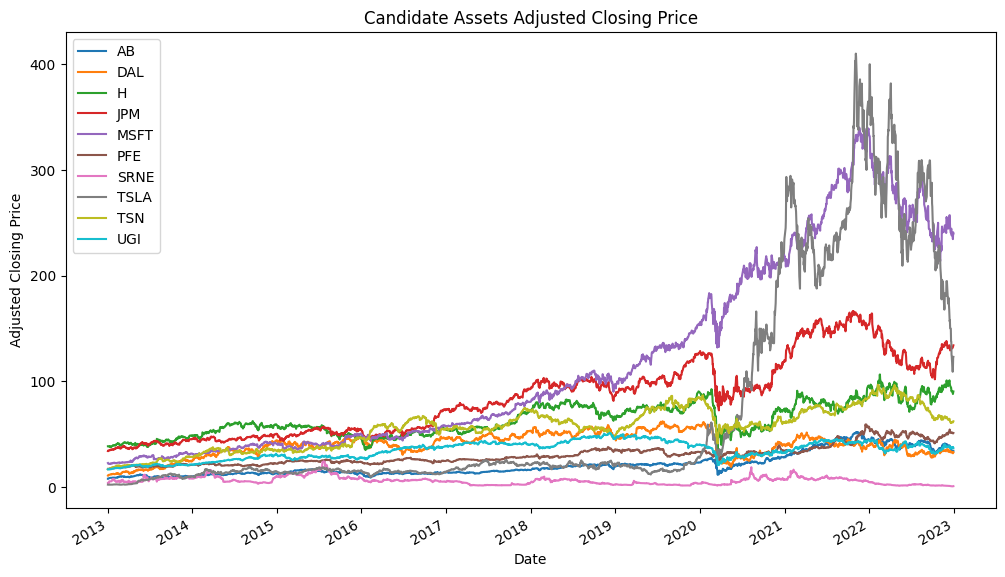

<function matplotlib.pyplot.clf()>

In [7]:
stock_data_adj_close = stock_data['Adj Close']
stock_data_adj_close.plot(figsize=(12,7))
plt.xlabel("Date")
plt.ylabel("Adjusted Closing Price")
plt.title("Candidate Assets Adjusted Closing Price")
plt.savefig('Adjusted Closing Price Over Time for all Candidates.png', dpi = 300, bbox_inches = 'tight')
plt.show()
plt.clf

### Calculate and plot the daily simple rate of return over time.

                  AB       DAL         H       JPM      MSFT       PFE  \
Date                                                                     
2013-01-02       NaN       NaN       NaN       NaN       NaN       NaN   
2013-01-03  0.000000  0.028618  0.000000 -0.002015 -0.013396 -0.002316   
2013-01-04  0.038355  0.031797  0.000507  0.017725 -0.018716  0.004255   
2013-01-07  0.027838  0.000770 -0.004057  0.001102 -0.001870  0.000771   
2013-01-08 -0.004167 -0.000770 -0.010438  0.001982 -0.005246  0.001539   
...              ...       ...       ...       ...       ...       ...   
2022-12-23 -0.015795  0.007290  0.006519  0.004745  0.002267  0.003679   
2022-12-27 -0.005544 -0.007841 -0.011856  0.003504 -0.007414 -0.013506   
2022-12-28 -0.027876 -0.027660 -0.021442  0.005465 -0.010255 -0.006454   
2022-12-29  0.037126  0.023132  0.015554  0.005738  0.027630  0.010433   
2022-12-30  0.000291  0.003972  0.011179  0.006606 -0.004938 -0.001753   

                SRNE      TSLA       

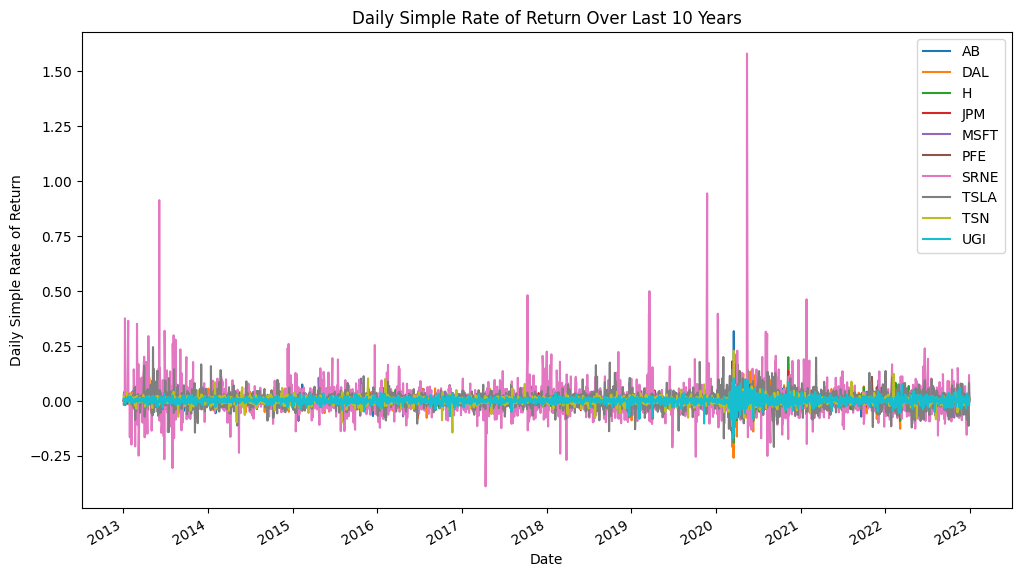

In [8]:
stock_data_daily_returns = stock_data['Adj Close'].pct_change()
print(stock_data_daily_returns)
stock_data_daily_returns.plot(figsize=(12,7))
plt.xlabel("Date")
plt.ylabel("Daily Simple Rate of Return")
plt.title("Daily Simple Rate of Return Over Last 10 Years")
plt.savefig('Daily Simple ROR - All.png', dpi = 300, bbox_inches = 'tight')
plt.show()

### Create subplots of daily simple rate of return.

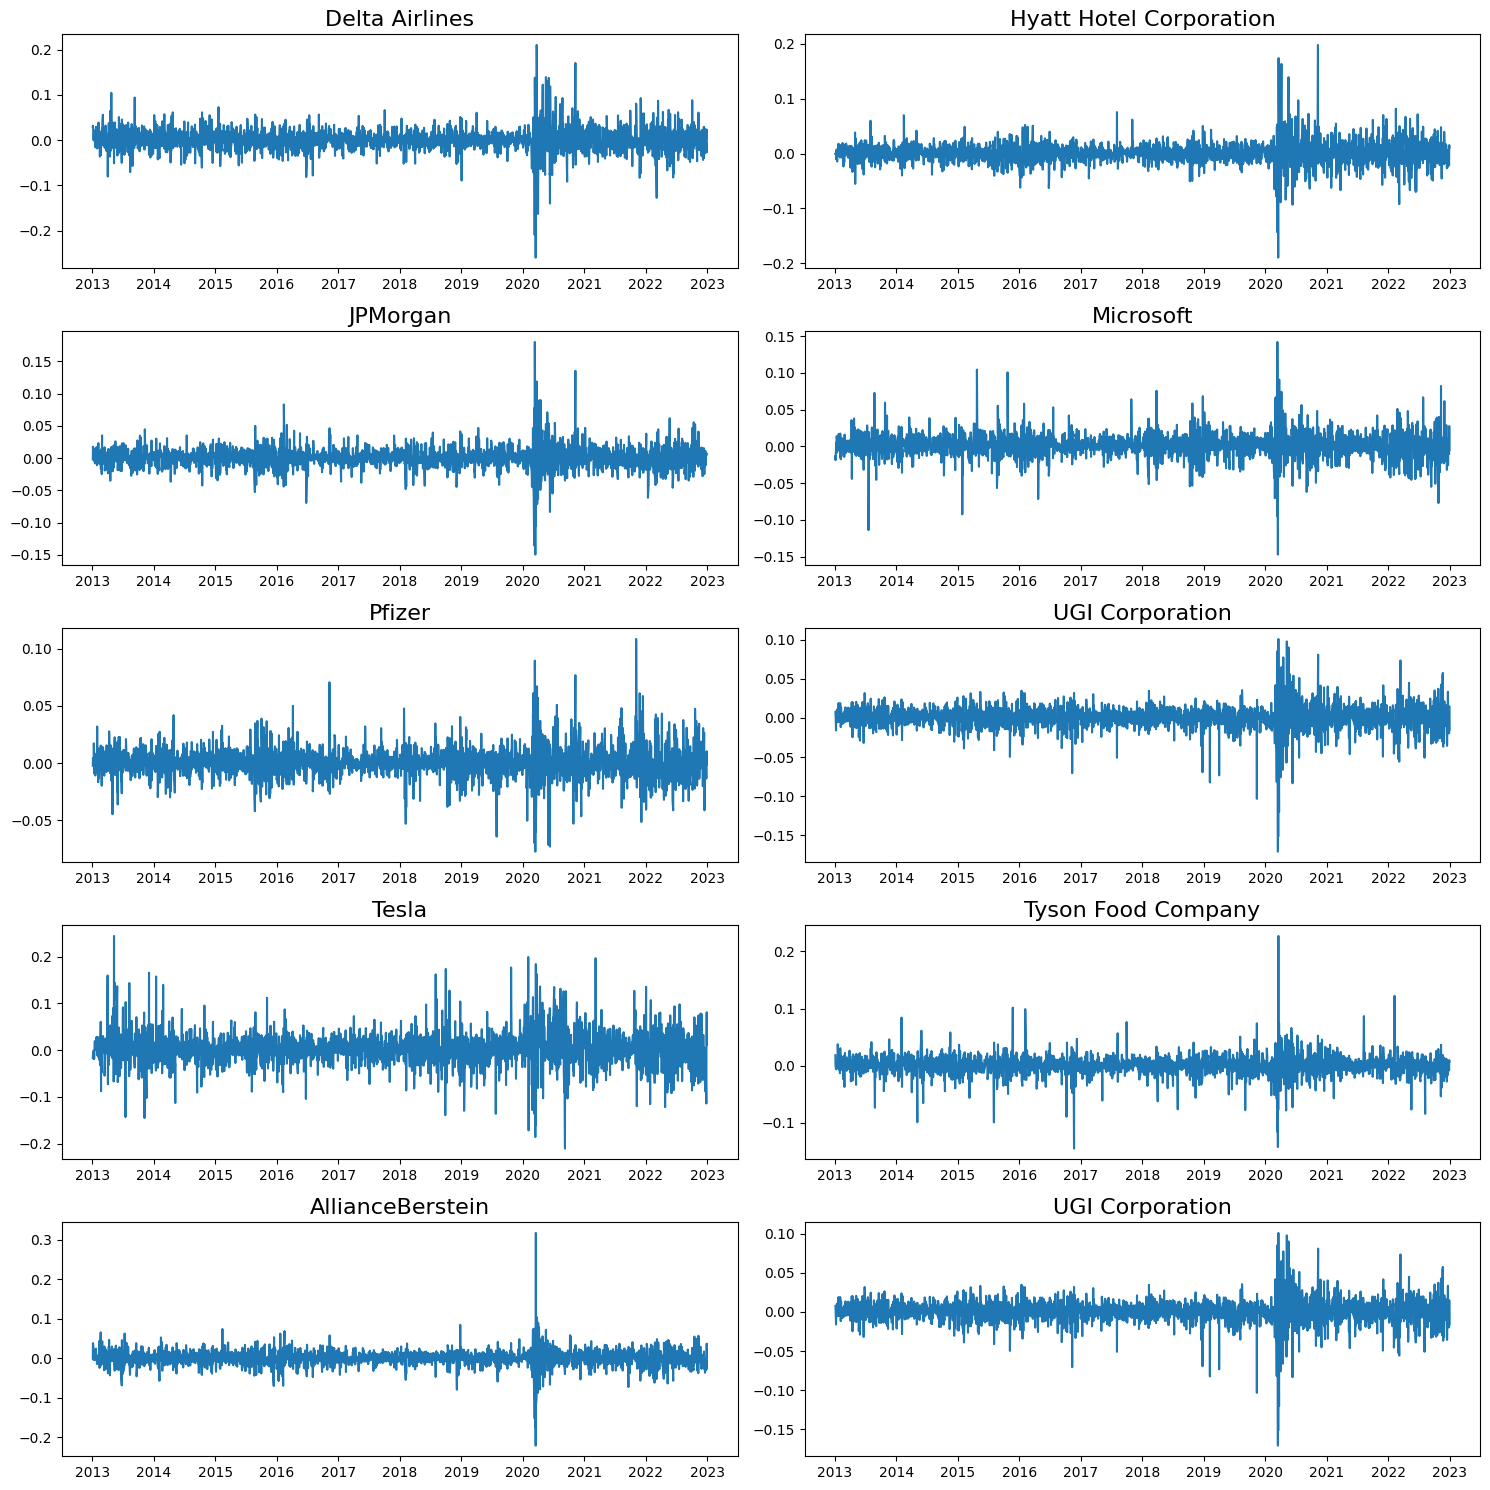

<function matplotlib.pyplot.clf()>

In [9]:
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(521)
ax2 = fig.add_subplot(522)
ax3 = fig.add_subplot(523)
ax4 = fig.add_subplot(524)
ax5 = fig.add_subplot(525)
ax6 = fig.add_subplot(526)
ax7 = fig.add_subplot(527)
ax8 = fig.add_subplot(528)
ax9 = fig.add_subplot(529)
ax10 = fig.add_subplot(5,2,10)
ax1.plot(stock_data['Adj Close']['DAL'].pct_change())
ax1.set_title("Delta Airlines", fontsize = 16)
ax2.plot(stock_data['Adj Close']['H'].pct_change())
ax2.set_title("Hyatt Hotel Corporation", fontsize = 16)
ax3.plot(stock_data['Adj Close']['JPM'].pct_change())
ax3.set_title("JPMorgan", fontsize = 16)
ax4.plot(stock_data['Adj Close']['MSFT'].pct_change())
ax4.set_title("Microsoft", fontsize = 16)
ax5.plot(stock_data['Adj Close']['PFE'].pct_change())
ax5.set_title("Pfizer", fontsize = 16)
ax6.plot(stock_data['Adj Close']['UGI'].pct_change())
ax6.set_title("UGI Corporation", fontsize = 16)
ax7.plot(stock_data['Adj Close']['TSLA'].pct_change())
ax7.set_title("Tesla", fontsize = 16)
ax8.plot(stock_data['Adj Close']['TSN'].pct_change())
ax8.set_title("Tyson Food Company", fontsize = 16)
ax9.plot(stock_data['Adj Close']['AB'].pct_change())
ax9.set_title("AllianceBerstein", fontsize = 16)
ax10.plot(stock_data['Adj Close']['UGI'].pct_change())
ax10.set_title("UGI Corporation", fontsize = 16)
plt.tight_layout()
plt.savefig('What Are The Daily Simple Rates of Return Over Time Per Stock.png', dpi = 300, bbox_inches = 'tight')
plt.show()
plt.clf

### 6. Calculate and plot the mean of each tech stock's daily simple rate of return

AB      0.000807
DAL     0.000766
H       0.000550
JPM     0.000687
MSFT    0.001081
PFE     0.000530
SRNE    0.001812
TSLA    0.002217
TSN     0.000677
UGI     0.000442
dtype: float64
Index(['AB', 'DAL', 'H', 'JPM', 'MSFT', 'PFE', 'SRNE', 'TSLA', 'TSN', 'UGI'], dtype='object')
[0.0008067067502282537, 0.0007657418165440001, 0.0005504386646799722, 0.0006867209525091636, 0.0010808003310010454, 0.0005295373517265306, 0.0018118810334484966, 0.0022172349847744233, 0.0006774260518380156, 0.00044167120453203197]


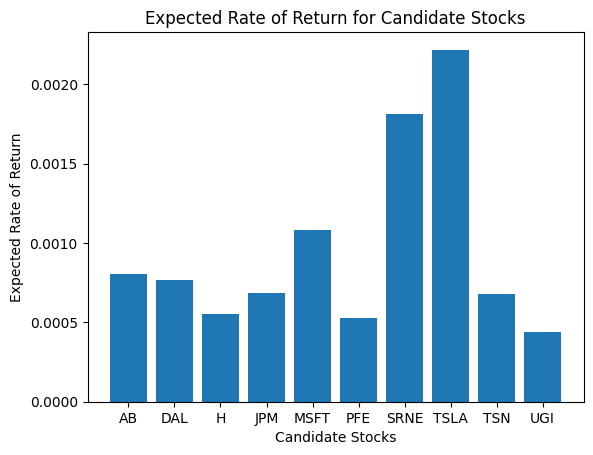

In [10]:
daily_mean = stock_data_daily_returns.mean()
print(daily_mean)
print(daily_mean.keys())

height = []
for key in daily_mean.keys():
    height.append(daily_mean[key])
print(height)

x_pos = np.arange(len(daily_mean.keys()))
plt.bar(x_pos, height)
plt.xticks(x_pos, daily_mean.keys())
plt.xlabel("Candidate Stocks")
plt.ylabel("Expected Rate of Return")
plt.title('Expected Rate of Return for Candidate Stocks')
plt.savefig('Average Daily Rate of Return per Stock.png', dpi = 300, bbox_inches = 'tight')
plt.show()

### 7. Calculate and plot the variance.

[0.0004420093236076615, 0.0006475558441660427, 0.0004255275290351018, 0.00028515155881531594, 0.0002900142459336077, 0.0001914518807000896, 0.005685790355943065, 0.0012974301104096155, 0.0003212261808933113, 0.0002520620908831432]


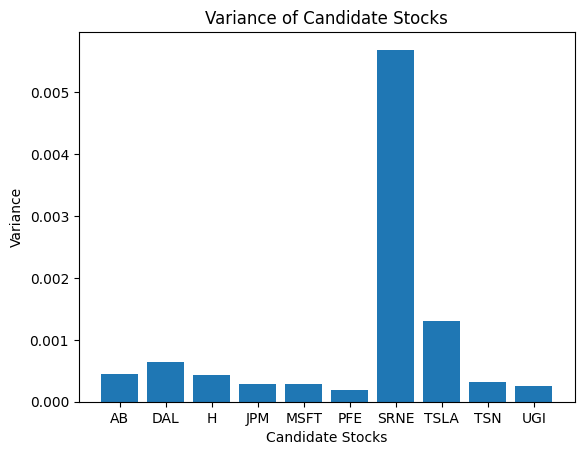

In [11]:
daily_var = stock_data_daily_returns.var()
height_var = []
for key in daily_var.keys():
    height_var.append(daily_var[key])
print(height_var)
x_pos_var = np.arange(len(daily_var.keys()))
plt.bar(x_pos_var, height_var)
plt.xticks(x_pos_var, daily_var.keys())
plt.xlabel("Candidate Stocks")
plt.ylabel("Variance")
plt.title('Variance of Candidate Stocks')
plt.savefig('Variance per Stock.png', dpi = 300, bbox_inches = 'tight')
plt.show()

### 8. Calculate and plot the standard deviation

[0.021024017779855055, 0.02544711858277952, 0.02062831861871204, 0.01688643120423365, 0.017029804635802715, 0.013836613772888568, 0.07540417996333536, 0.036019857168090155, 0.01792278384886989, 0.0158764634249301]


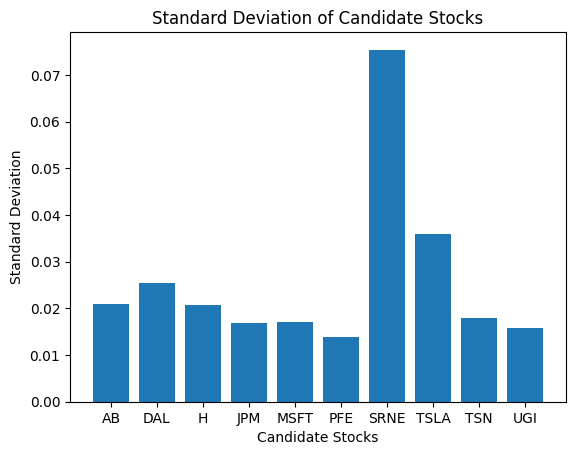

In [12]:
daily_std = stock_data_daily_returns.std()
height_std = []
for key in daily_std.keys():
    height_std.append(daily_std[key])
print(height_std)
x_pos_std = np.arange(len(daily_std.keys()))
plt.bar(x_pos_std, height_std)
plt.xticks(x_pos_std, daily_std.keys())
plt.xlabel("Candidate Stocks")
plt.ylabel("Standard Deviation")
plt.title('Standard Deviation of Candidate Stocks')
plt.savefig('Standard Deviation per Stock.png', dpi = 300, bbox_inches = 'tight')
plt.show()

### 9. Calculate the correlations
Calculate the correlations between each of the stocks. Which stocks are positively correlated? Which are negatively correlated? Which have little correlation?

In [13]:
corr = stock_data_daily_returns.corr()
corr.to_csv('Correlations.csv')
corr

,AB,DAL,H,JPM,MSFT,PFE,SRNE,TSLA,TSN,UGI
AB,1.000000,0.417092,0.453519,0.547890,0.425517,0.270549,0.099298,0.311672,0.339829,0.483175
DAL,0.417092,1.000000,0.617344,0.558798,0.321565,0.249500,0.091663,0.250136,0.301849,0.383936
H,0.453519,0.617344,1.000000,0.542304,0.359325,0.210094,0.103727,0.279038,0.338968,0.423308
JPM,0.547890,0.558798,0.542304,1.000000,0.473147,0.410091,0.084315,0.244719,0.344979,0.487203
MSFT,0.425517,0.321565,0.359325,0.473147,1.000000,0.361582,0.168739,0.375454,0.255476,0.337263
PFE,0.270549,0.249500,0.210094,0.410091,0.361582,1.000000,0.098900,0.132334,0.203889,0.291458
SRNE,0.099298,0.091663,0.103727,0.084315,0.168739,0.098900,1.000000,0.146297,0.078941,0.067881
TSLA,0.311672,0.250136,0.279038,0.244719,0.375454,0.132334,0.146297,1.000000,0.153088,0.168783
TSN,0.339829,0.301849,0.338968,0.344979,0.255476,0.203889,0.078941,0.153088,1.000000,0.349262
UGI,0.483175,0.383936,0.423308,0.487203,0.337263,0.291458,0.067881,0.168783,0.349262,1.000000


## Covariance Matrix

In [14]:
covariance_return = stock_data_daily_returns.cov()
covariance_return.to_csv('Covariance.csv')
covariance_return

,AB,DAL,H,JPM,MSFT,PFE,SRNE,TSLA,TSN,UGI
AB,0.000442,0.000223,0.000197,0.000195,0.000152,0.000079,0.000157,0.000236,0.000128,0.000161
DAL,0.000223,0.000648,0.000324,0.000240,0.000139,0.000088,0.000176,0.000229,0.000138,0.000155
H,0.000197,0.000324,0.000426,0.000189,0.000126,0.000060,0.000161,0.000207,0.000125,0.000139
JPM,0.000195,0.000240,0.000189,0.000285,0.000136,0.000096,0.000107,0.000149,0.000104,0.000131
MSFT,0.000152,0.000139,0.000126,0.000136,0.000290,0.000085,0.000217,0.000230,0.000078,0.000091
PFE,0.000079,0.000088,0.000060,0.000096,0.000085,0.000191,0.000103,0.000066,0.000051,0.000064
SRNE,0.000157,0.000176,0.000161,0.000107,0.000217,0.000103,0.005686,0.000397,0.000107,0.000081
TSLA,0.000236,0.000229,0.000207,0.000149,0.000230,0.000066,0.000397,0.001297,0.000099,0.000097
TSN,0.000128,0.000138,0.000125,0.000104,0.000078,0.000051,0.000107,0.000099,0.000321,0.000099
UGI,0.000161,0.000155,0.000139,0.000131,0.000091,0.000064,0.000081,0.000097,0.000099,0.000252


Heat Map of Covariance Matrix

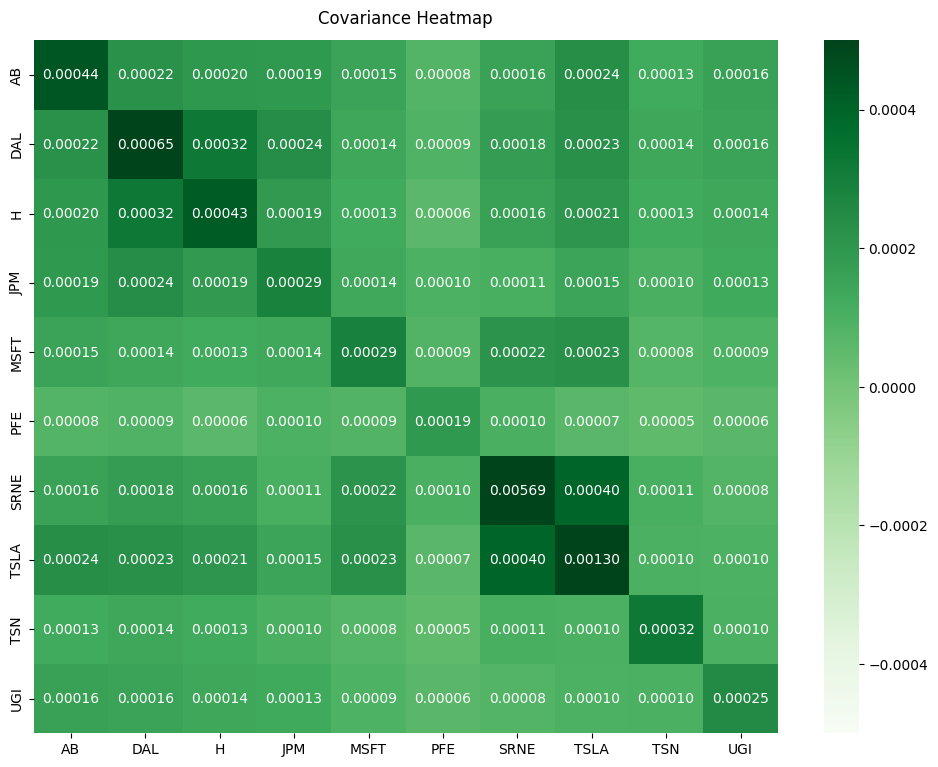

<function matplotlib.pyplot.clf()>

In [15]:
plt.figure(figsize = (12,9))
corr_returns_heatmap = sns.heatmap(covariance_return, vmin=-0.0005, vmax=0.0005, annot=True, fmt='.5f', cmap='Greens')
corr_returns_heatmap.set_title('Covariance Heatmap', fontdict={'fontsize':12}, pad=12)
plt.savefig('What Does The Covariance Heat Map Look Like.png', dpi = 300, bbox_inches = 'tight')

# show graphic
plt.show()
plt.clf

## Efficient Frontier for Portfolio

To calculate the efficient frontier for our portfolio, we need to define a couple functions. 

return_portfolios:
* parameters: expected returns and covariance matrix
* returns: DataFrame with columns for 'Returns', 'Volatility', and Weight Asset 1, ... , Weight Asset n

optimal_portfolios:
* parameter: returns - returns of all assets over specificed time
* returns: 
    1. Weights - weight for each asset in portfolio
    2. Returns - expected return on portfolio
    3. Risks - risks of each portfolio - measured in std deviation

In [16]:
def return_portfolios(expected_returns, cov_matrix):
    port_returns = []
    port_volatility = []
    stock_weights = []
    
    selected = (expected_returns.axes)[0]
    
    num_assets = len(selected) 
    num_portfolios = 5000
    
    for single_portfolio in range(num_portfolios):
        weights = np.random.random(num_assets)
        weights /= np.sum(weights)
        returns = np.dot(weights, expected_returns)
        volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
        port_returns.append(returns)
        port_volatility.append(volatility)
        stock_weights.append(weights)
    
    portfolio = {'Returns': port_returns,
                 'Volatility': port_volatility}
    
    for counter,symbol in enumerate(selected):
        portfolio[symbol +' Weight'] = [Weight[counter] for Weight in stock_weights]
    
    df = pd.DataFrame(portfolio)
    
    column_order = ['Returns', 'Volatility'] + [stock+' Weight' for stock in selected]
    
    df = df[column_order]
   
    return df
  
def optimal_portfolio(returns):
    n = returns.shape[1]
    returns = np.transpose(returns.to_numpy())

    N = 100
    mus = [10**(5.0 * t/N - 1.0) for t in range(N)]

    # Convert to cvxopt matrices
    S = opt.matrix(np.cov(returns))
    pbar = opt.matrix(np.mean(returns, axis=1))

    # Create constraint matrices
    G = -opt.matrix(np.eye(n))   # negative n x n identity matrix
    h = opt.matrix(0.0, (n ,1))
    A = opt.matrix(1.0, (1, n))
    b = opt.matrix(1.0)

    # Calculate efficient frontier weights using quadratic programming
    portfolios = [solvers.qp(mu*S, -pbar, G, h, A, b)['x']
                  for mu in mus]
    ## CALCULATE RISKS AND RETURNS FOR FRONTIER
    returns = [blas.dot(pbar, x) for x in portfolios]
    risks = [np.sqrt(blas.dot(x, S*x)) for x in portfolios]
    ## CALCULATE THE 2ND DEGREE POLYNOMIAL OF THE FRONTIER CURVE
    m1 = np.polyfit(returns, risks, 2)
    x1 = np.sqrt(m1[2] / m1[0])
    # CALCULATE THE OPTIMAL PORTFOLIO
    wt = solvers.qp(opt.matrix(x1 * S), -pbar, G, h, A, b)['x']
    return np.asarray(wt), returns, risks

Now we calculate our efficient frontier and map it on graph with all portfolios


In [17]:
my_portfolios = return_portfolios(daily_mean, covariance_return)
weights, returns, risks = optimal_portfolio(stock_data_daily_returns[1:])

     pcost       dcost       gap    pres   dres
 0: -9.4831e-04 -1.0022e+00  1e+00  0e+00  3e+00
 1: -9.4891e-04 -1.2199e-02  1e-02  6e-17  4e-02
 2: -1.0018e-03 -2.2968e-03  1e-03  5e-17  4e-03
 3: -1.9189e-03 -2.9328e-03  1e-03  8e-16  2e-03
 4: -2.1123e-03 -2.1602e-03  5e-05  1e-16  1e-04
 5: -2.1520e-03 -2.1524e-03  5e-07  2e-16  1e-06
 6: -2.1524e-03 -2.1524e-03  5e-09  2e-16  1e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -9.4689e-04 -1.0022e+00  1e+00  0e+00  3e+00
 1: -9.4748e-04 -1.2196e-02  1e-02  2e-16  4e-02
 2: -1.0001e-03 -2.2943e-03  1e-03  6e-17  4e-03
 3: -1.9319e-03 -2.9423e-03  1e-03  7e-16  2e-03
 4: -2.1074e-03 -2.1525e-03  5e-05  1e-16  9e-05
 5: -2.1441e-03 -2.1445e-03  5e-07  1e-18  9e-07
 6: -2.1444e-03 -2.1444e-03  5e-09  1e-16  9e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -9.4529e-04 -1.0022e+00  1e+00  0e+00  3e+00
 1: -9.4588e-04 -1.2194e-02  1e-02  2e-16  4e-02
 2: -9.9815e-04 -2.2914e

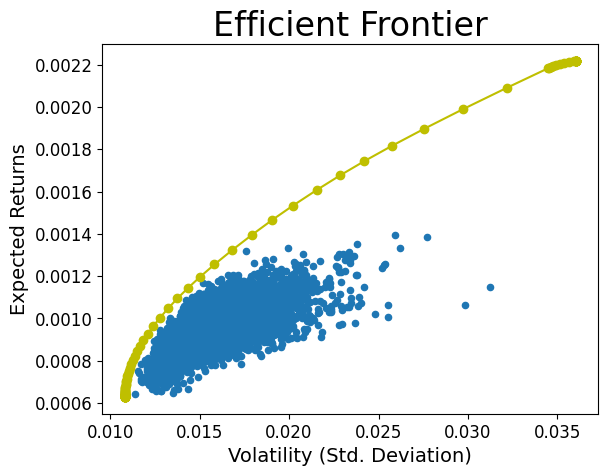

In [18]:
my_portfolios.plot.scatter(x='Volatility', y='Returns', fontsize=12)
plt.plot(risks, returns, 'y-o')
plt.ylabel('Expected Returns',fontsize=14)
plt.xlabel('Volatility (Std. Deviation)',fontsize=14)
plt.title('Efficient Frontier', fontsize=24)
plt.savefig('Efficient Frontier.png', dpi = 300, bbox_inches = 'tight')
plt.show()

Now the efficient frontier with optimal ends highlighted:
* Red triangle marks the portfolio with the lowest risk
* Red X marks the portfolio with the highest return

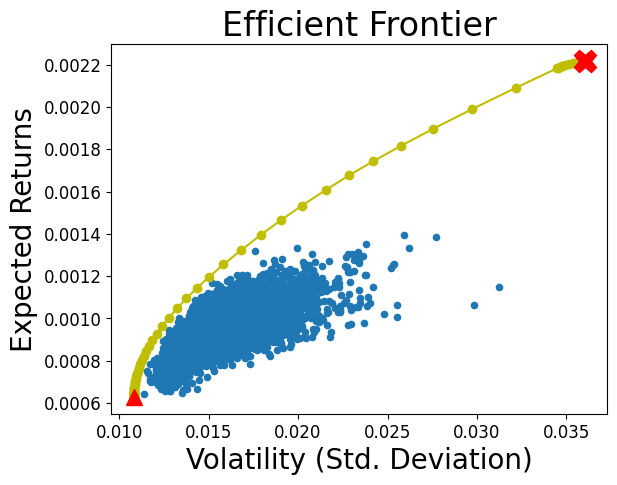

In [19]:
min_risk_idx = np.array(risks).argmin()
max_return_idx = np.array(risks).argmax()
min_risk = [risks[min_risk_idx], returns[min_risk_idx]]
max_return = [risks[max_return_idx], returns[max_return_idx]]

my_portfolios.plot.scatter(x='Volatility', y='Returns', fontsize=12)
plt.plot(risks, returns, 'y-o')
plt.plot(min_risk[0],min_risk[1],'r^', markersize=12)
plt.plot(max_return[0],max_return[1],'rX',markersize=16)
plt.ylabel('Expected Returns',fontsize=20)
plt.xlabel('Volatility (Std. Deviation)',fontsize=20)
plt.title('Efficient Frontier', fontsize=24)
plt.savefig('Efficient Frontier with max return and min risk.png', dpi = 300, bbox_inches = 'tight')
plt.show()

The portfolio with the minimum risk is:

In [20]:
min_risk_portfolio = my_portfolios[my_portfolios['Volatility'] == my_portfolios['Volatility'].min()]
min_risk_portfolio

,Returns,Volatility,AB Weight,DAL Weight,H Weight,JPM Weight,MSFT Weight,PFE Weight,SRNE Weight,TSLA Weight,TSN Weight,UGI Weight
3489,0.000642,0.011398,0.035281,0.005934,0.057022,0.114157,0.010846,0.293244,0.015601,0.015902,0.291741,0.160273


The maximum returns portfolio is:

In [21]:
max_return_portfolio = my_portfolios[my_portfolios['Returns'] == my_portfolios['Returns'].max()]

max_return_portfolio

,Returns,Volatility,AB Weight,DAL Weight,H Weight,JPM Weight,MSFT Weight,PFE Weight,SRNE Weight,TSLA Weight,TSN Weight,UGI Weight
3058,0.001395,0.0259,0.02755,0.032821,0.069071,0.009088,0.007955,0.042345,0.267353,0.28945,0.143895,0.110472


The portfolio with the median risk would be:

In [29]:
my_portfolios_sorted = my_portfolios.sort_values(by='Volatility')
my_portfolios['Volatility'].median()
med_risk_portfolio = my_portfolios[my_portfolios_sorted['Volatility'] == my_portfolios_sorted['Volatility'].quantile(interpolation='nearest')]
med_risk_portfolio

/var/folders/wf/58f_wzs5275g6q2mqv8bnfdr0000gn/T/ipykernel_3104/1714406609.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  med_risk_portfolio = my_portfolios[my_portfolios_sorted['Volatility'] == my_portfolios_sorted['Volatility'].quantile(interpolation='nearest')]


,Returns,Volatility,AB Weight,DAL Weight,H Weight,JPM Weight,MSFT Weight,PFE Weight,SRNE Weight,TSLA Weight,TSN Weight,UGI Weight
272,0.001103,0.015565,0.169683,0.017813,0.030797,0.086276,0.174332,0.021644,0.077164,0.181526,0.116938,0.123827


The portfolio with the median return would be:

In [30]:
med_return_portfolio = my_portfolios[my_portfolios_sorted['Returns'] == my_portfolios_sorted['Returns'].quantile(interpolation='nearest')]
med_return_portfolio


/var/folders/wf/58f_wzs5275g6q2mqv8bnfdr0000gn/T/ipykernel_3104/710641085.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  med_return_portfolio = my_portfolios[my_portfolios_sorted['Returns'] == my_portfolios_sorted['Returns'].quantile(interpolation='nearest')]


,Returns,Volatility,AB Weight,DAL Weight,H Weight,JPM Weight,MSFT Weight,PFE Weight,SRNE Weight,TSLA Weight,TSN Weight,UGI Weight
1275,0.000957,0.020241,0.048276,0.075792,0.139309,0.077965,0.138283,0.134334,0.215966,0.005708,0.137681,0.026685


In [31]:
med_return_portfolio_transposed = med_return_portfolio.T
med_return_portfolio_transposed

,1275
Returns,0.000957
Volatility,0.020241
AB Weight,0.048276
DAL Weight,0.075792
H Weight,0.139309
JPM Weight,0.077965
MSFT Weight,0.138283
PFE Weight,0.134334
SRNE Weight,0.215966
TSLA Weight,0.005708


In [33]:
merged_portfolios = pd.concat([max_return_portfolio, med_return_portfolio, med_risk_portfolio, min_risk_portfolio])
merged_portfolios

,Returns,Volatility,AB Weight,DAL Weight,H Weight,JPM Weight,MSFT Weight,PFE Weight,SRNE Weight,TSLA Weight,TSN Weight,UGI Weight
3058,0.001395,0.025900,0.027550,0.032821,0.069071,0.009088,0.007955,0.042345,0.267353,0.289450,0.143895,0.110472
1275,0.000957,0.020241,0.048276,0.075792,0.139309,0.077965,0.138283,0.134334,0.215966,0.005708,0.137681,0.026685
272,0.001103,0.015565,0.169683,0.017813,0.030797,0.086276,0.174332,0.021644,0.077164,0.181526,0.116938,0.123827
3489,0.000642,0.011398,0.035281,0.005934,0.057022,0.114157,0.010846,0.293244,0.015601,0.015902,0.291741,0.160273


In [36]:
merged_portfolios_transposed = merged_portfolios.T
merged_portfolios_transposed.columns = ['Maximium Return', 'Median Return', 'Median Risk', 'Minimum Risk']
merged_portfolios_transposed.to_csv("Portfolio Example Weights.csv")
merged_portfolios_transposed

,Maximium Return,Median Return,Median Risk,Minimum Risk
Returns,0.001395,0.000957,0.001103,0.000642
Volatility,0.025900,0.020241,0.015565,0.011398
AB Weight,0.027550,0.048276,0.169683,0.035281
DAL Weight,0.032821,0.075792,0.017813,0.005934
H Weight,0.069071,0.139309,0.030797,0.057022
JPM Weight,0.009088,0.077965,0.086276,0.114157
MSFT Weight,0.007955,0.138283,0.174332,0.010846
PFE Weight,0.042345,0.134334,0.021644,0.293244
SRNE Weight,0.267353,0.215966,0.077164,0.015601
TSLA Weight,0.289450,0.005708,0.181526,0.015902
